In [1]:
#Import sys for path adjustment
import sys
sys.path.append('../')

#keras packages
import keras
from keras.preprocessing import image

#Dataframes and arrays
import numpy as np
import pandas as pd

#dataviz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns = ['alternative', 'black', 'classic', 'death', 'deathcore', 'djent',
       'electronic', 'folk', 'gothic', 'groove', 'hard', 'hardcore', 'heavy',
       'melodic', 'metal', 'metalcore', 'modern', 'nu', 'postgrunge',
       'posthardcore', 'power', 'progressive', 'punk', 'rock', 'symphonic',
       'technical', 'thrash']

In [3]:
model = keras.models.load_model('../data/models/sequential_run10_trained.sav/')

(1, 1008, 360, 3)

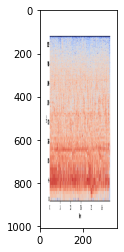

In [16]:
test_path = '../data/test_sample/Annihilator_Kraign_spectro.png'
test_img = image.image_utils.load_img(test_path, target_size=(1008,360, 3))
test_img = image.image_utils.img_to_array(test_img)
test_img = test_img/255
plt.imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)
test_img.shape

In [17]:
yhat = model.predict(test_img)

1/1 [==============================] - 0s 62ms/step


In [18]:
yhat

array([[0.5158616 , 0.8068539 , 0.708043  , 0.01328446, 0.29517442,
        0.3968625 , 0.05256779, 0.13892496, 0.2334953 , 0.6972037 ,
        0.880721  , 0.0200089 , 0.77946013, 0.9480051 , 0.39128405,
        0.53359956, 0.1967985 , 0.12865308, 0.7636165 , 0.03614266,
        0.27818677, 0.3712918 , 0.602091  , 0.29947287, 0.12423959,
        0.9108657 , 0.6097533 ]], dtype=float32)

In [19]:
predict_data = pd.DataFrame(data=np.round_(yhat*100, decimals=2), columns=columns)

In [20]:
predict_pivot = predict_data.pivot_table(columns='Score')

In [21]:
predict_pivot.sort_values('Score', ascending=False)

,Score
melodic,94.800003
technical,91.089996
hard,88.070000
black,80.690002
heavy,77.949997
postgrunge,76.360001
classic,70.800003
groove,69.720001
thrash,60.980000
punk,60.209999
